<a href="https://colab.research.google.com/github/tharani694/USL_works/blob/main/ML_Unsupervised_CT3_Tharani.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SRM M.Tech _Unsupervised Model___Assignment

### Dataset Information: cluster_data.csv
The experiments have been carried out with a group of 30 volunteers within an age bracket of 19-48 years. Each person performed six activities (WALKING, WALKING_UPSTAIRS, WALKING_DOWNSTAIRS, SITTING, STANDING, LAYING) wearing a smartphone (Samsung Galaxy S II) on the waist. Using its embedded accelerometer and gyroscope, they have captured 3-axial linear acceleration and 3-axial angular velocity at a constant rate of 50Hz. The experiments have been video-recorded to label the data manually.

This Dataset consist of:

--A 561-feature vector with time and frequency domain variables.

--Its activity label(Target Variable).

--An identifier of the subject who carried out the experiment

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

#####  a.Read the Dataset (1Mark)



In [9]:
dataset = pd.read_csv('human_activity.csv')
dataset.head()

,rn,activity,tBodyAcc.mean.X,tBodyAcc.mean.Y,tBodyAcc.mean.Z,tBodyAcc.std.X,tBodyAcc.std.Y,tBodyAcc.std.Z,tBodyAcc.mad.X,tBodyAcc.mad.Y,...,fBodyBodyGyroJerkMag.meanFreq,fBodyBodyGyroJerkMag.skewness,fBodyBodyGyroJerkMag.kurtosis,angle.tBodyAccMean.gravity,angle.tBodyAccJerkMean.gravityMean,angle.tBodyGyroMean.gravityMean,angle.tBodyGyroJerkMean.gravityMean,angle.X.gravityMean,angle.Y.gravityMean,angle.Z.gravityMean
0,7,STANDING,0.279,-0.0196,-0.1100,-0.997,-0.967,-0.983,-0.997,-0.966,...,0.146,-0.217,-0.5640,-0.2130,-0.2310,0.0146,-0.190,-0.852,0.182,-0.0430
1,11,STANDING,0.277,-0.0127,-0.1030,-0.995,-0.973,-0.985,-0.996,-0.974,...,0.121,0.349,0.0577,0.0807,0.5960,-0.4760,0.116,-0.852,0.188,-0.0347
2,14,STANDING,0.277,-0.0147,-0.1070,-0.999,-0.991,-0.993,-0.999,-0.991,...,0.740,-0.564,-0.7660,0.1060,-0.0903,-0.1320,0.499,-0.850,0.189,-0.0351
3,15,STANDING,0.298,0.0271,-0.0617,-0.989,-0.817,-0.902,-0.989,-0.794,...,0.131,0.208,-0.0681,0.0623,-0.0587,0.0312,-0.269,-0.731,0.283,0.0364
4,20,STANDING,0.276,-0.0170,-0.1110,-0.998,-0.991,-0.998,-0.998,-0.989,...,0.667,-0.942,-0.9660,0.2450,0.1030,0.0661,-0.412,-0.761,0.263,0.0296


##### b. Remove the Unwanter features(1 Mark)



In [12]:
dataset.columns

Index(['rn', 'activity', 'tBodyAcc.mean.X', 'tBodyAcc.mean.Y',
       'tBodyAcc.mean.Z', 'tBodyAcc.std.X', 'tBodyAcc.std.Y', 'tBodyAcc.std.Z',
       'tBodyAcc.mad.X', 'tBodyAcc.mad.Y',
       ...
       'fBodyBodyGyroJerkMag.meanFreq', 'fBodyBodyGyroJerkMag.skewness',
       'fBodyBodyGyroJerkMag.kurtosis', 'angle.tBodyAccMean.gravity',
       'angle.tBodyAccJerkMean.gravityMean', 'angle.tBodyGyroMean.gravityMean',
       'angle.tBodyGyroJerkMean.gravityMean', 'angle.X.gravityMean',
       'angle.Y.gravityMean', 'angle.Z.gravityMean'],
      dtype='object', length=563)

In [13]:
dataset.shape

(3609, 563)

In [18]:
if(sum(dataset.duplicated()) == 0):
    print("No duplicates!!")
else:
    print("We Have duplicate values!")

No duplicates!!


In [14]:
dataset.isnull().sum()

rn                                     0
activity                               0
tBodyAcc.mean.X                        0
tBodyAcc.mean.Y                        0
tBodyAcc.mean.Z                        0
                                      ..
angle.tBodyGyroMean.gravityMean        0
angle.tBodyGyroJerkMean.gravityMean    0
angle.X.gravityMean                    0
angle.Y.gravityMean                    0
angle.Z.gravityMean                    0
Length: 563, dtype: int64

In [24]:
dataset1=dataset.drop(['rn','activity'],axis=1)

In [25]:
dataset1.describe()

,tBodyAcc.mean.X,tBodyAcc.mean.Y,tBodyAcc.mean.Z,tBodyAcc.std.X,tBodyAcc.arCoeff.X.1,tBodyAcc.arCoeff.X.4,tBodyAcc.arCoeff.Y.1,tBodyAcc.arCoeff.Y.3,tBodyAcc.arCoeff.Y.4,tBodyAcc.arCoeff.Z.1,...,fBodyBodyGyroMag.min,fBodyBodyGyroMag.maxInds,fBodyBodyGyroMag.skewness,fBodyBodyGyroJerkMag.maxInds,fBodyBodyGyroJerkMag.meanFreq,fBodyBodyGyroJerkMag.skewness,angle.tBodyAccMean.gravity,angle.tBodyAccJerkMean.gravityMean,angle.tBodyGyroMean.gravityMean,angle.tBodyGyroJerkMean.gravityMean
count,3609.000000,3609.000000,3609.000000,3609.000000,3609.000000,3609.000000,3609.000000,3609.000000,3609.000000,3609.000000,...,3609.000000,3609.000000,3609.000000,3609.000000,3609.000000,3609.000000,3609.000000,3609.000000,3609.000000,3609.000000
mean,0.274544,-0.017415,-0.109195,-0.608457,-0.122053,0.121511,-0.033849,0.150928,-0.013920,0.003629,...,-0.887261,-0.887529,-0.263164,-0.900569,0.128804,-0.300815,0.007561,0.009484,0.029185,-0.010632
std,0.063589,0.042589,0.056218,0.439157,0.309582,0.233786,0.254841,0.207778,0.220689,0.281583,...,0.167120,0.160830,0.322711,0.139138,0.240278,0.317963,0.332249,0.448971,0.613615,0.490830
min,-0.521000,-1.000000,-0.926000,-1.000000,-0.898000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-0.786000,-0.968000,-0.969000,-0.997000,-1.000000,-0.993000
25%,0.262000,-0.025200,-0.122000,-0.992000,-0.376000,-0.035900,-0.227000,0.027300,-0.157000,-0.208000,...,-0.994000,-1.000000,-0.501000,-0.968000,-0.015800,-0.533000,-0.118000,-0.281000,-0.478000,-0.398000
50%,0.277000,-0.017200,-0.109000,-0.939000,-0.134000,0.128000,-0.051100,0.153000,-0.018000,0.015600,...,-0.960000,-0.949000,-0.315000,-0.905000,0.132000,-0.341000,0.007740,0.009830,0.029600,-0.013400
75%,0.287000,-0.011000,-0.098000,-0.254000,0.134000,0.282000,0.156000,0.283000,0.134000,0.218000,...,-0.838000,-0.846000,-0.083600,-0.873000,0.290000,-0.118000,0.142000,0.309000,0.554000,0.374000
max,0.693000,1.000000,1.000000,1.000000,0.762000,0.865000,0.633000,0.981000,1.000000,0.827000,...,1.000000,1.000000,1.000000,0.937000,0.871000,0.990000,0.981000,0.997000,0.999000,0.996000


#####  c. compute how many pair of variables having the correlation more than 0.8 ?  (1 Mark)

In [26]:
# Create correlation matrix
corr_matrix = dataset1.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find features with correlation greater than 0.8
to_drop = [column for column in upper.columns if any(upper[column] > 0.8)]

# Drop features 
dataset1.drop(to_drop, axis=1, inplace=True)
corr_matrix

,tBodyAcc.mean.X,tBodyAcc.mean.Y,tBodyAcc.mean.Z,tBodyAcc.std.X,tBodyAcc.arCoeff.X.1,tBodyAcc.arCoeff.X.4,tBodyAcc.arCoeff.Y.1,tBodyAcc.arCoeff.Y.3,tBodyAcc.arCoeff.Y.4,tBodyAcc.arCoeff.Z.1,...,fBodyBodyGyroMag.min,fBodyBodyGyroMag.maxInds,fBodyBodyGyroMag.skewness,fBodyBodyGyroJerkMag.maxInds,fBodyBodyGyroJerkMag.meanFreq,fBodyBodyGyroJerkMag.skewness,angle.tBodyAccMean.gravity,angle.tBodyAccJerkMean.gravityMean,angle.tBodyGyroMean.gravityMean,angle.tBodyGyroJerkMean.gravityMean
tBodyAcc.mean.X,1.000000,0.216780,0.302976,0.026776,0.027248,0.049893,0.027578,0.022859,0.038613,0.021049,...,0.006984,0.044335,0.059596,0.015450,0.024893,0.003043,0.567714,0.017247,0.038627,0.035722
tBodyAcc.mean.Y,0.216780,1.000000,0.104570,0.053585,0.037025,0.041671,0.020650,0.022016,0.007402,0.009620,...,0.035859,0.010827,0.017102,0.007031,0.023401,0.005899,0.069540,0.038813,0.005894,0.063621
tBodyAcc.mean.Z,0.302976,0.104570,1.000000,0.041524,0.001944,0.027409,0.001643,0.006180,0.015057,0.008254,...,0.007367,0.008734,0.000074,0.035071,0.020979,0.015779,0.051885,0.051859,0.059418,0.023572
tBodyAcc.std.X,0.026776,0.053585,0.041524,1.000000,0.704579,0.332974,0.522089,0.184099,0.029497,0.488566,...,0.583258,0.313648,0.250933,0.117478,0.078044,0.166553,0.046226,0.009885,0.048096,0.028095
tBodyAcc.arCoeff.X.1,0.027248,0.037025,0.001944,0.704579,1.000000,0.250588,0.623413,0.200743,0.007594,0.626032,...,0.435775,0.248079,0.087464,0.034369,0.229109,0.240467,0.012108,0.000256,0.022134,0.013573
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
fBodyBodyGyroJerkMag.skewness,0.003043,0.005899,0.015779,0.166553,0.240467,0.025356,0.283150,0.085333,0.029264,0.251194,...,0.164167,0.092397,0.014701,0.284966,0.374457,1.000000,0.011173,0.000007,0.056767,0.012094
angle.tBodyAccMean.gravity,0.567714,0.069540,0.051885,0.046226,0.012108,0.044377,0.007728,0.036836,0.044641,0.013355,...,0.010271,0.032447,0.068074,0.000521,0.026042,0.011173,1.000000,0.111583,0.035379,0.024574
angle.tBodyAccJerkMean.gravityMean,0.017247,0.038813,0.051859,0.009885,0.000256,0.012398,0.017630,0.011707,0.001902,0.002310,...,0.008013,0.008556,0.016613,0.013918,0.007314,0.000007,0.111583,1.000000,0.016817,0.025604
angle.tBodyGyroMean.gravityMean,0.038627,0.005894,0.059418,0.048096,0.022134,0.029507,0.006666,0.029218,0.005793,0.000782,...,0.058873,0.034763,0.035961,0.004998,0.047721,0.056767,0.035379,0.016817,1.000000,0.119781


d. Perform Scaling

In [27]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
dataset_scaled=scaler.fit_transform(dataset1)
dataset_scaled=pd.DataFrame(dataset_scaled,columns=dataset1.columns)
dataset_scaled.head()

,tBodyAcc.mean.X,tBodyAcc.mean.Y,tBodyAcc.mean.Z,tBodyAcc.std.X,tBodyAcc.arCoeff.X.1,tBodyAcc.arCoeff.X.4,tBodyAcc.arCoeff.Y.1,tBodyAcc.arCoeff.Y.3,tBodyAcc.arCoeff.Y.4,tBodyAcc.arCoeff.Z.1,...,fBodyBodyGyroMag.min,fBodyBodyGyroMag.maxInds,fBodyBodyGyroMag.skewness,fBodyBodyGyroJerkMag.maxInds,fBodyBodyGyroJerkMag.meanFreq,fBodyBodyGyroJerkMag.skewness,angle.tBodyAccMean.gravity,angle.tBodyAccJerkMean.gravityMean,angle.tBodyGyroMean.gravityMean,angle.tBodyGyroJerkMean.gravityMean
0,0.070090,-0.051303,-0.014321,-0.884871,1.557323,-0.222504,0.385189,-0.062228,-0.103690,0.807588,...,-0.644773,-0.699415,-0.182344,-0.714721,0.071576,0.263638,-0.663934,-0.535708,-0.023772,-0.365489
1,0.038634,0.110734,0.110213,-0.880316,1.512095,0.203159,0.053565,-1.275227,1.164334,1.056217,...,-0.596896,-0.699415,0.839981,-0.714721,-0.032484,2.043967,0.220164,1.306538,-0.823407,0.258032
2,0.038634,0.063767,0.039051,-0.889426,1.725315,-0.230204,1.267036,0.789759,-0.625764,0.629996,...,-0.662727,-0.382266,-1.536683,-0.484701,2.544059,-0.827836,0.296322,-0.222281,-0.262717,1.038451
3,0.368926,1.045384,0.844961,-0.866652,0.904740,-1.897345,-1.103393,-2.204230,1.617523,-0.307691,...,0.240943,-0.699415,1.051747,-0.714721,0.009140,1.600458,0.164776,-0.151889,0.003285,-0.526463
4,0.022905,0.009755,-0.032111,-0.887148,1.315027,1.773189,0.964845,1.275922,-1.169591,1.915764,...,-0.668711,-0.699415,1.457119,0.651022,2.240201,-2.016820,0.714741,0.208319,0.060169,-0.817847


##### e.Apply PCA and compute the required number of principle components to capture the 90 percent variance of the original data(3 Marks)

In [32]:
from sklearn.decomposition import PCA
pca = PCA(n_components=0.9)
pca.fit(dataset_scaled)

PCA(n_components=0.9)

In [33]:
pca.n_components_

77

In [34]:
pca_dataset = pca.transform(dataset_scaled)
pca_dataset.shape

(3609, 77)

##### f. Print the Eigen values and Eigen vectors of top 5 PCs(2 Marks)

In [35]:
import numpy as np
from numpy.linalg import eig
z = np.array(pca_dataset[0:5,0:5])
X,Y=eig(z)
print('Eigen value: ', X)
print('Eigen vector: ', Y)

Eigen value:  [-4.91650502+0.j         -2.44995292+0.j          0.68414049+2.44984623j
  0.68414049-2.44984623j  3.57224029+0.j        ]
Eigen vector:  [[ 0.04010725+0.j         -0.11273466+0.j          0.43373159+0.14403323j
   0.43373159-0.14403323j  0.31960485+0.j        ]
 [-0.49097303+0.j         -0.22293983+0.j          0.24069824-0.02774952j
   0.24069824+0.02774952j  0.60773763+0.j        ]
 [-0.22618494+0.j         -0.00747539+0.j          0.63617825+0.j
   0.63617825-0.j         -0.32880022+0.j        ]
 [ 0.81194487+0.j          0.17382838+0.j          0.25729575-0.13470669j
   0.25729575+0.13470669j  0.62454836+0.j        ]
 [ 0.21661669+0.j          0.95253165+0.j          0.45888152+0.18106254j
   0.45888152-0.18106254j -0.17417657+0.j        ]]


##### g. Build the K-means clustering model with reduced PCA features (PCs which are explaining 90 percent variance)(2 Mark)

In [38]:
from sklearn.cluster import KMeans
error=[]
for i in range(1,10):
  KN=KMeans(n_clusters=i)
  KN.fit(pca_dataset)
  error.append(KN.inertia_)
error

[474718.1690148744,
 409336.59590504493,
 387377.8369362927,
 374631.18104529055,
 363829.6610249314,
 355483.2875928002,
 349798.8476638617,
 343677.094363068,
 338695.59282771335]

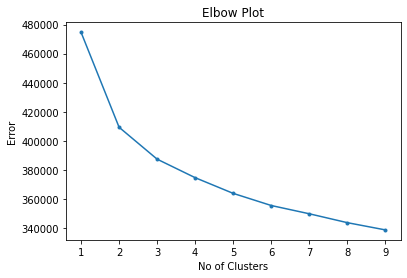

In [39]:
plt.plot(range(1,10),error,marker='.')
plt.xlabel('No of Clusters')
plt.ylabel('Error')
plt.title('Elbow Plot')
plt.show()

In [40]:
KN=KMeans(n_clusters=3,random_state=100)
KN.fit(pca_dataset)

KMeans(n_clusters=3, random_state=100)

In [41]:
dataset_k = dataset.copy()
dataset_k['Cluster_label']=KN.labels_
dataset_k.head()

,rn,activity,tBodyAcc.mean.X,tBodyAcc.mean.Y,tBodyAcc.mean.Z,tBodyAcc.std.X,tBodyAcc.arCoeff.X.1,tBodyAcc.arCoeff.X.4,tBodyAcc.arCoeff.Y.1,tBodyAcc.arCoeff.Y.3,...,fBodyBodyGyroMag.maxInds,fBodyBodyGyroMag.skewness,fBodyBodyGyroJerkMag.maxInds,fBodyBodyGyroJerkMag.meanFreq,fBodyBodyGyroJerkMag.skewness,angle.tBodyAccMean.gravity,angle.tBodyAccJerkMean.gravityMean,angle.tBodyGyroMean.gravityMean,angle.tBodyGyroJerkMean.gravityMean,Cluster_label
0,7,STANDING,0.279,-0.0196,-0.1100,-0.997,0.360,0.0695,0.0643,0.138,...,-1.000,-0.32200,-1.000,0.146,-0.217,-0.2130,-0.2310,0.0146,-0.190,0
1,11,STANDING,0.277,-0.0127,-0.1030,-0.995,0.346,0.1690,-0.0202,-0.114,...,-1.000,0.00787,-1.000,0.121,0.349,0.0807,0.5960,-0.4760,0.116,0
2,14,STANDING,0.277,-0.0147,-0.1070,-0.999,0.412,0.0677,0.2890,0.315,...,-0.949,-0.75900,-0.968,0.740,-0.564,0.1060,-0.0903,-0.1320,0.499,0
3,15,STANDING,0.298,0.0271,-0.0617,-0.989,0.158,-0.3220,-0.3150,-0.307,...,-1.000,0.07620,-1.000,0.131,0.208,0.0623,-0.0587,0.0312,-0.269,1
4,20,STANDING,0.276,-0.0170,-0.1110,-0.998,0.285,0.5360,0.2120,0.416,...,-1.000,0.20700,-0.810,0.667,-0.942,0.2450,0.1030,0.0661,-0.412,0


##### h.compute the optimal value of clusters. Make the business inferences using the cluster groups(3 Marks)

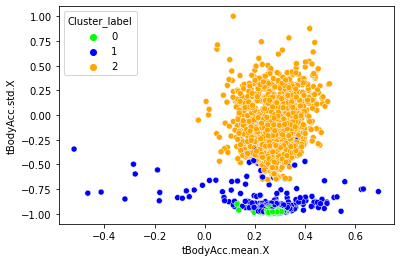

In [44]:
import seaborn as sb
sb.scatterplot(x='tBodyAcc.mean.X',y='tBodyAcc.std.X', hue='Cluster_label', data =dataset_k,palette=['lime','blue','orange'])
plt.show()

##### Inference:
######K Means algorithm through elbow plot it can be infered that the ideal number of clusters is 3.
######The Three clusters represent three activities: Walking, Standing and Sitting